In [1]:
from analysis.utils import load_report_files
from analysis.visualization import Visualization

MODEL_TYPE_MAP = {
    "mistral": "llm",
    "llama3.1": "llm",
    "llama3.2": "llm",
    "gemma": "llm",
    "phi3": "llm",
    "m2m100": "mt",
    "marian": "mt",
    "nllb": "mt",
    "mbart50": "mt",
}

In [2]:
df = load_report_files("reports")
viz = Visualization(df, MODEL_TYPE_MAP)

# 🔍 Overview of Evaluated Models

| Model      | Type           | Size (Parameters) | Description |
|------------|----------------|-------------------|-------------|
| `mbart50`  | MT-specific    | ~610M             | Facebook’s multilingual encoder-decoder model for 50+ languages. |
| `marian`   | MT-specific    | ~280M             | Fast, language-pair–specific model from Helsinki-NLP. |
| `nllb`     | MT-specific    | 600M (distilled)  | Facebook’s "No Language Left Behind" (distilled version). |
| `m2m100`   | MT-specific    | ~418M             | Facebook’s many-to-many multilingual model supporting 100+ languages. |
| `mistral`  | General LLM    | 7B                | Decoder-only open LLM (Mistral AI); not trained for translation. |
| `llama3.1` | General LLM    | 8B                | Meta’s LLaMA 3 model (8B), with instruction tuning and multilingual potential. |
| `llama3.2` | General LLM    | 3B                | Smaller LLaMA 3 variant (3B); weaker performance on translation tasks. |
| `gemma`    | General LLM    | 4B                | Google’s compact open-source LLM, multilingual-capable. |
| `phi3`     | General LLM    | 3.8B              | Microsoft’s small LLM designed for efficiency; weak on translation. |


# Evaluation Setup

#### Language Pairs
We evaluated translations **from six source languages into English** using subsets of the **WMT-19 dataset**:

- 🇩🇪 German → English (`de-en`)
- 🇫🇮 Finnish → English (`fi-en`)
- 🇮🇳 Gujarati → English (`gu-en`)
- 🇱🇹 Lithuanian → English (`lt-en`)
- 🇷🇺 Russian → English (`ru-en`)
- 🇨🇳 Chinese → English (`zh-en`)

Each language pair was tested on a ** sample of 1,000 sentence pairs**, due to computational constraints.

---

#### Tools & Frameworks

- **Translation-specific models** were run using the [Hugging Face `transformers`](https://huggingface.co/docs/transformers) library.
- **LLM-based models** (e.g. LLaMA, Mistral, Gemma, Phi) were evaluated using [Ollama](https://ollama.com/) and its Python client to query local models.

---

#### Language Mappings (per model type)

Each model family requires different language code formats. Below is an example for `de-en` (German to English):

| Model Type     | Source Lang | Target Lang |
|----------------|-------------|-------------|
| `nllb`         | `deu_Latn`  | `eng_Latn`  |
| `m2m100`       | `de`        | `en`        |
| `mbart50`      | `de_DE`     | `en_XX`     |
| `marian`       | `de`        | `en`        |
| `llama/gemma/phi3/mistral` | `German`     | `English`     |

Equivalent mappings were provided for all language pairs.

---

#### Metrics

We evaluated translation quality using two standard automatic metrics:

---

**BLEU (Bilingual Evaluation Understudy)**  
- Measures n-gram overlap between predicted and reference translations.
- Scores range from **0** (no match) to **1** (perfect match).
- BLEU favors **literal, surface-level matches** and performs best for **high-resource languages** with predictable grammar.

**Interpretation**:
- **0.4+** — Excellent (near-human quality on high-resource pairs)
- **0.3–0.4** — Good
- **0.2–0.3** — Understandable but flawed
- **0.1–0.2** — Low quality, often ungrammatical or misleading
- **<0.1** — Very poor translation or unrelated output

---

**METEOR (Metric for Evaluation of Translation with Explicit ORdering)**  
- Goes beyond surface overlap: accounts for **synonyms**, **stems**, and **word reordering**.
- Scores range from **0 to 1** (typically lower than BLEU numerically but more linguistically meaningful).

**Interpretation**:
- **0.60+** — Very strong translation (fluent and faithful)
- **0.50–0.60** — Good quality
- **0.40–0.50** — Mixed quality (minor omissions or awkward phrasing)
- **<0.40** — Often disfluent or semantically incorrect

**Notes**:
- BLEU can **underestimate paraphrased translations**, which affects general LLMs more.
- METEOR may better reflect fluency and semantic accuracy in LLM outputs.
- Neither metric perfectly captures human judgment — both are used here for **relative comparison across models**.


---

#### Limitations
- Evaluation was limited to 1,000 samples per language pair due to compute constraints.
- LLMs were prompted in zero-shot format (no few-shot examples provided).
- Only English-targeted directions were evaluated.


# Bleu and meteor scores by model

## Bleu Scores

In [3]:
viz.get_bleu_score_table()

language_pair,de-en,fi-en,gu-en,lt-en,ru-en,zh-en
base_model,,,,,,
gemma,0.2173,0.1929,0.0980,0.1756,0.2208,0.2253
llama3.1,0.2054,0.1730,0.0951,0.1000,0.1953,0.1957
llama3.2,0.1757,0.1314,0.0215,0.0768,0.1741,0.1806
m2m100,0.2223,0.2163,0.0193,0.2484,0.2072,0.2026
marian,0.2899,0.2948,NaN,NaN,0.1930,0.2573
mbart50,0.2859,0.2928,0.8241,0.5610,0.2370,0.2721
mistral,0.1812,0.1144,0.0013,0.0388,0.1934,0.1803
nllb,0.2726,0.2570,0.1026,0.2570,0.2141,0.2476
phi3,0.1520,0.0318,0.0000,0.0099,0.0951,0.1204


## Meteor Scores

In [4]:
viz.get_meteor_score_table()

language_pair,de-en,fi-en,gu-en,lt-en,ru-en,zh-en
base_model,,,,,,
gemma,0.5098,0.4902,0.3822,0.4187,0.4517,0.5118
llama3.1,0.5060,0.4724,0.3897,0.3820,0.4291,0.4921
llama3.2,0.4708,0.4113,0.3160,0.3071,0.3952,0.4691
m2m100,0.5106,0.5107,0.0724,0.5756,0.4578,0.5161
marian,0.5754,0.5848,NaN,NaN,0.4595,0.5662
mbart50,0.5709,0.5834,0.6522,0.8063,0.4973,0.5734
mistral,0.4772,0.3782,0.0869,0.2662,0.4135,0.4740
nllb,0.5551,0.5473,0.3934,0.5510,0.4709,0.5461
phi3,0.4437,0.2192,0.0584,0.1779,0.3214,0.3954


# Average scores by model type

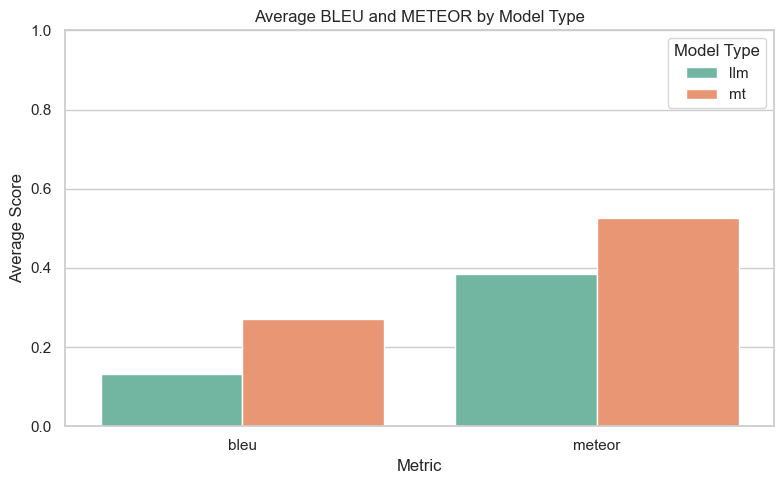

In [5]:
viz.plot_average_scores_by_type()

# Average scores grouped by model

In [6]:
df["general_model"] = df["model"].str.split("_").str[0]
df_grouped = df.groupby("general_model")[["bleu", "meteor"]].mean().reset_index()
df_grouped = df_grouped.sort_values("bleu", ascending=False)

df_grouped

,general_model,bleu,meteor
5,mbart50,0.412150,0.613917
4,marian,0.258750,0.546475
7,nllb,0.225150,0.510633
0,gemma,0.188317,0.460733
3,m2m100,0.186017,0.440533
1,llama3.1,0.160750,0.445217
2,llama3.2,0.126683,0.394917
6,mistral,0.118233,0.349333
8,phi3,0.068200,0.269333


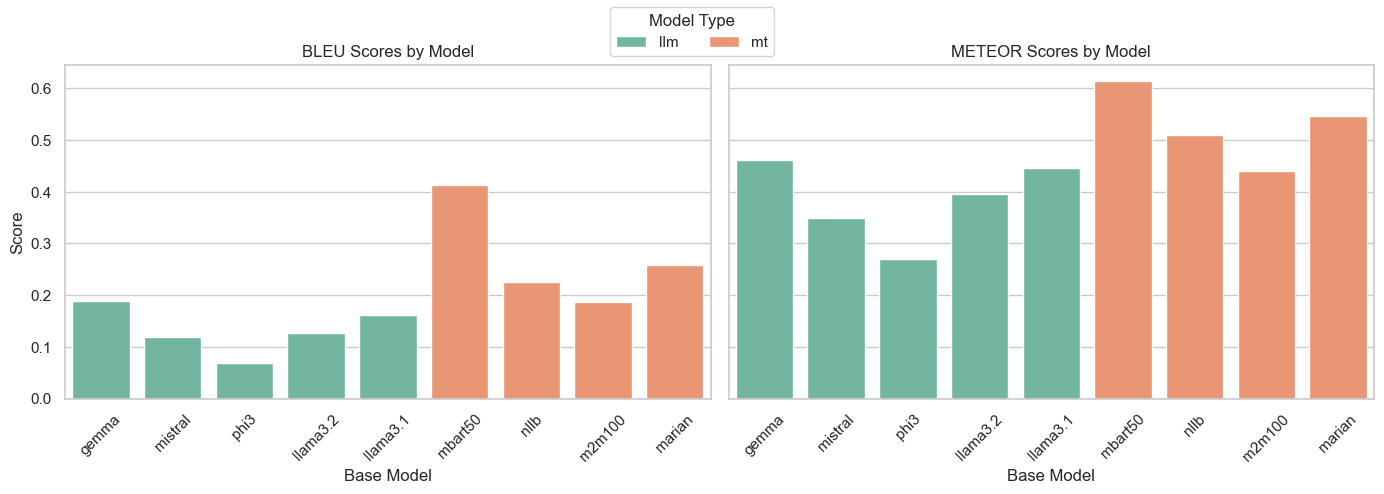

In [7]:
viz.plot_grouped_scores()

# Average scores grouped by language pair

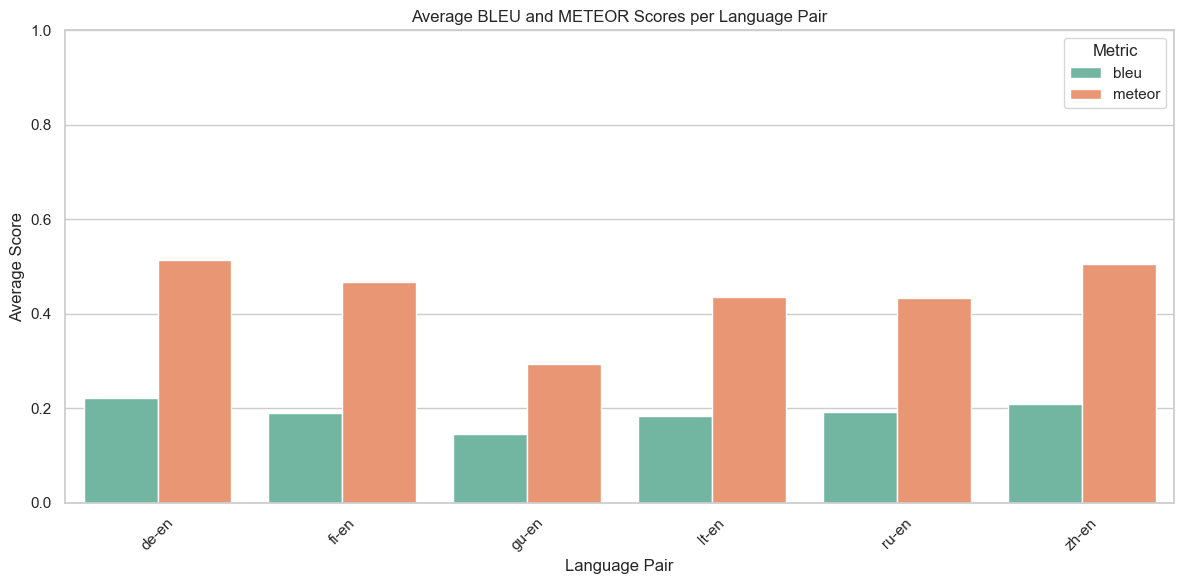

In [8]:
viz.plot_scores_by_language_pair()

# Average scores grouped by language pair and model type

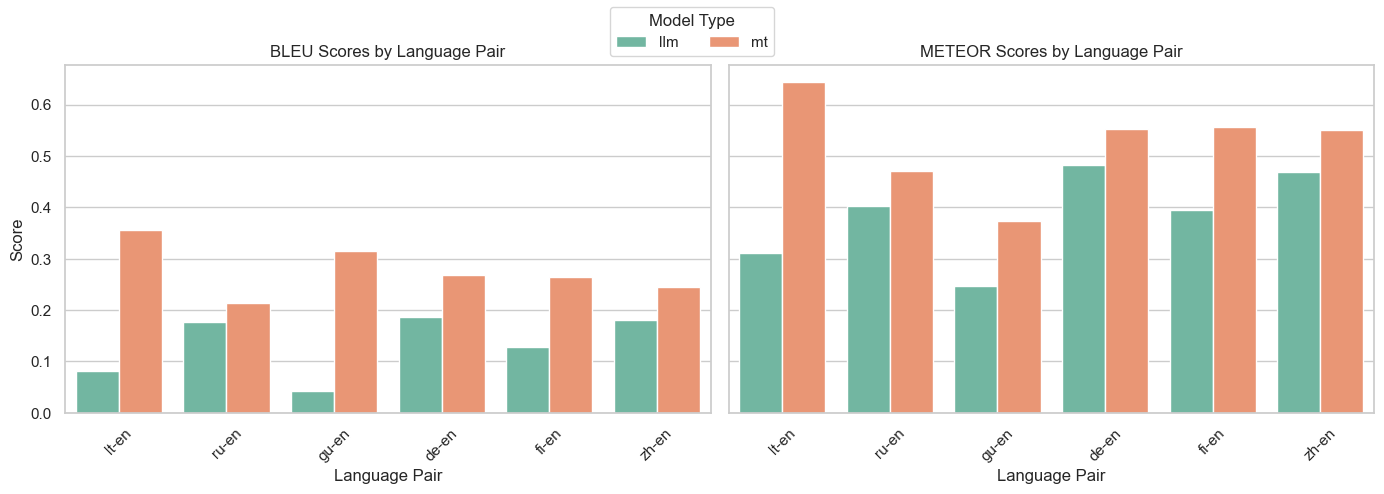

In [9]:
viz.plot_scores_by_language_pair_model_type()